In [ ]:
# TEST DATA QUALITY for corrected data
# Explore Result Quality Part I.
# This notebook looks at the distribution of the score value in our dataset

In [1]:
# >>> Preparation
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("../../_data/names_cat_i2.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:5]))

Importing names... 
Names imported. They look like this:                                         name likely_gender  n_publs  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        female        2      8
(David) Jing Dai            (David) Jing Dai          male        1      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng          male        2      8
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        female        2      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai          male        2      6


In [2]:

import pandas
print("Importing names... ")
names_old = pandas.read_csv("../../_data/names_cat.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names_old = names_old.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names_old[:5]))

Importing names... 
Names imported. They look like this:                                         name  n_publs likely_gender  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        2        female      8
(David) Jing Dai            (David) Jing Dai        1          male      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng        2          male      2
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        2        female      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai        2          male      6


In [3]:
f = names[names['likely_gender'] == 'female']
m = names[names['likely_gender'] == 'male']

In [4]:
f_old = names_old[names_old['likely_gender'] == 'female']
m_old = names_old[names_old['likely_gender'] == 'male']

In [5]:
# Get bin sizes for histograms
bins_f = f['score'].max()
bins_f = int(round(bins_f))

bins_m = m['score'].max()
bins_m = int(round(bins_m))

In [6]:
# Get bin sizes for histograms
bins_f_old = f_old['score'].max()
bins_m_old = m_old['score'].max()

In [7]:
# >>> Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

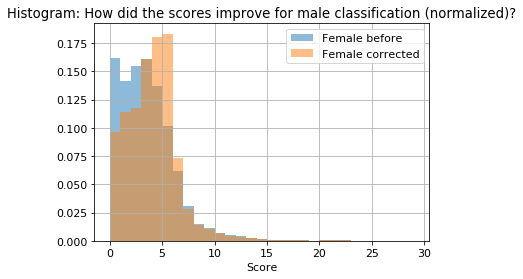

In [15]:
f_old['score'].hist(density="True", alpha=0.5, label="Female before", bins=bins_f_old)
f['score'].hist(density="True", alpha=0.5, label="Female corrected", bins=bins_f)

plt.xlabel("Score")
plt.title("Histogram: How did the scores improve for male classification (normalized)?")
plt.legend()

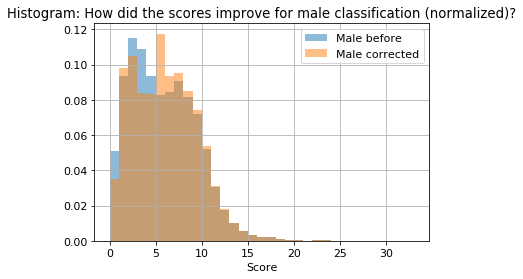

In [16]:
m_old['score'].hist(density="True", alpha=0.5, label="Male before", bins=bins_m_old)
m['score'].hist(density="True", alpha=0.5, label="Male corrected", bins=bins_m)

plt.xlabel("Score")
plt.title("Histogram: How did the scores improve for male classification (normalized)?")
plt.legend()

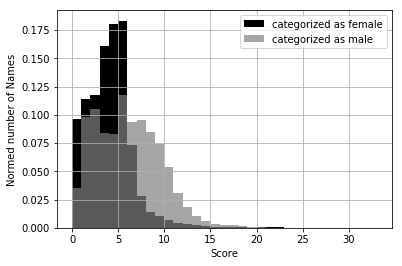

In [8]:
f["score"].hist(density=True, color="black", label="categorized as female", bins=bins_f)
m["score"].hist(alpha=0.7, density=True, color="grey", label="categorized as male", bins=bins_m)

plt.xlabel("Score")
plt.ylabel("Normed number of Names")
plt.legend()

plt.savefig('graphs/score/after_improving_by_gender.pdf')
plt.savefig('graphs/score/after_improving_by_gender.pgf')

In [12]:
names[names["score"] > 4].describe() # 1256315 / 2306418 = 0.5447039521890654

,n_publs,score
count,1.256315e+06,1.256315e+06
mean,6.139819e+00,7.633209e+00
std,1.822332e+01,2.543957e+00
min,1.000000e+00,5.000000e+00
25%,1.000000e+00,6.000000e+00
50%,2.000000e+00,7.000000e+00
75%,4.000000e+00,9.000000e+00
max,1.694000e+03,3.300000e+01


In [ ]:
# >>> Evaluation:
# The scores are still not equally distributed. 
# The NamSor API endpoint that takes a parsed name could improve the results for scores that where previously 5 or lower,
# so we see a considerable shift for the score distribution for women: Their scores are now way better! 
# I later found out that scores can NOT be compared across API endpoints so, the improvement does not matter,
# but the distribution does.
# Women's results improved more than men's results